

# Projeto 3 - Ciência dos dados 

###### Nomes: Gustavo, Matheus, Pedro Carani e Thiago David

# Modelo preditivo do indíce Ibovespa baseado no próprio indíce.




## Bibliografia:

    - Montgomery. Cap 11, pág 333.
    -https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score
    -https://scikit-learn.org/stable/modules/model_evaluation.html

## Regressão Linear


 
A regressão linear é um método de ajuste de reta dos dados que estão sendo considerados, e pode ser calculado de acordo com a seguinte fórmula: $y_i=\beta_0+\beta_1x_i+\epsilon_i$. Também, ajuda na procura por padrões e anomalias desses dados.  Primeiro, para fazer uma regressão linear, é necessário achar os coeficientes $\beta_0$ e $\beta_1$.

Para achar o $\beta_0$ nós usamos a seguinte fórmula:

$$\beta_0=\bar{y}-\beta_1\bar{x}$$

E para achar o $\beta_1$ usamos a seguinte fórmula: $$\beta_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

Após achar os coeficientes é necessário achar o vetor de resíduos através da fórmula: $\epsilon_i=y_i-(\beta_0+\beta_1x_i)$. Com os coeficientes e o vetor de resíduo já é possível a reta da regressão linear.
    

## Sobre o nosso Modelo:


 ### Os dados foram coletados do site https://finance.yahoo.com/:

     - Ibovespa (2018-2019)
     
     
     
     
   

## Qual variável explicativa vai ser utilizada?

#### A variável explicativa a ser utilzada no modelo será o valor do índice ibovespa anterior.

## Nosso modelo:

## Importando bibliotecas: 

In [183]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


## Lendo os arquivos de dados:

In [184]:
ibov=pd.read_csv("bov.csv")


# Análise exploratória dos dados:

## Dados do Ibovespa

In [185]:
ibov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,87719.0,88570.0,85620.0,85620.0,85620.0,5297700
1,2018-11-09,85620.0,86233.0,84030.0,85641.0,85641.0,4814400
2,2018-11-12,85644.0,86227.0,85009.0,85525.0,85525.0,3534000
3,2018-11-13,85531.0,85941.0,84071.0,84914.0,84914.0,4410700
4,2018-11-14,84898.0,85973.0,84267.0,85973.0,85973.0,5591600


## Vamos analisar apenas os dados de fechamento

In [186]:
ibov["Close"]

0       85620.000000
1       85641.000000
2       85525.000000
3       84914.000000
4       85973.000000
           ...      
244    108601.000000
245    108451.000000
246    108336.000000
247    109581.000000
248    108884.710938
Name: Close, Length: 249, dtype: float64

## Criando um novo Dataset com apenas as informações necessárias (fechamento) para a análise:

In [187]:
ibov=pd.DataFrame(ibov, columns=['Date','Close'])


## Dataset do Ibovespa para o modelo:

In [188]:
ibov.head()

,Date,Close
0,2018-11-08,85620.0
1,2018-11-09,85641.0
2,2018-11-12,85525.0
3,2018-11-13,84914.0
4,2018-11-14,85973.0


## Separando os dados:

In [189]:
date=ibov['Date']
pontos=ibov['Close']


## Boxplot do índice Ibovespa


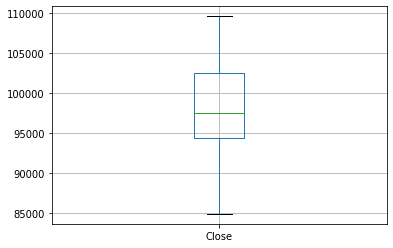

In [190]:
ibov.boxplot();


## Histograma do Ibovespa

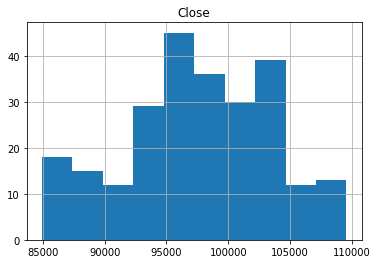

In [191]:
ibov.hist();

Pelo histograma, é possivel analisar que as maiorias dos dados se encontram entre 95.000 pontos a 100.000 pontos.

## Gráfico do Ibovespa durante os anos de 2018 e 2019.

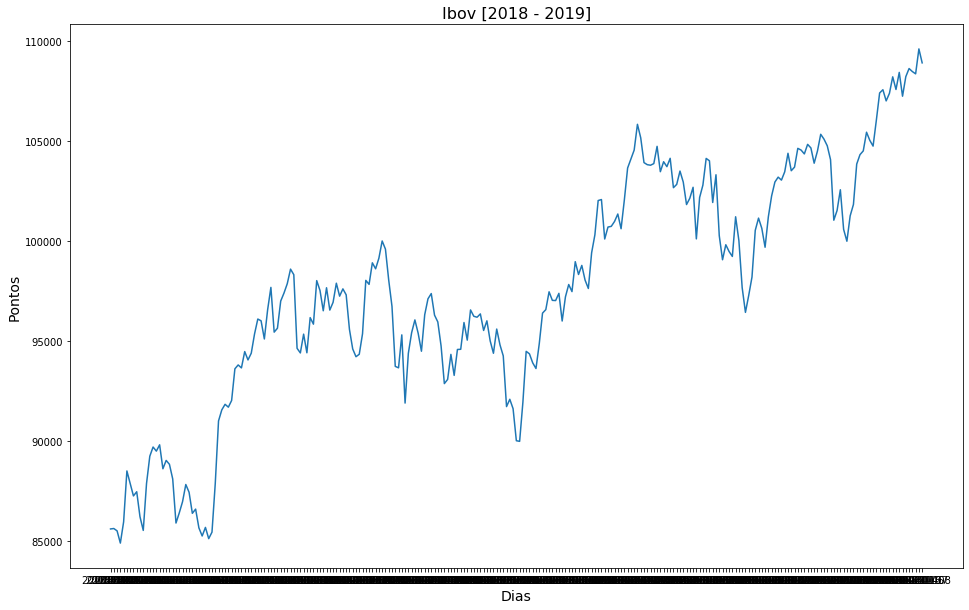

In [192]:
plt.figure(1, figsize=(16,10))
plt.plot(date, pontos)
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show();



## Modelo (((EM CONSTRUCAO))): 

In [193]:
lista = np.array(pontos)
lista=lista[1:]
len(lista)
ibov_anterior=pd.DataFrame(lista)
ibov_anterior




ibov_novo=ibov.join(ibov_anterior, lsuffix='_caller', rsuffix='_other')
ibov_novo
ibovespa=ibov_novo.rename(columns={"Close": "Fechamento anterior", 0: "Fechamento"})
ibovespa

ibovespa=ibovespa.dropna()


### Separar dados para treinamento e teste

In [194]:
train, test = train_test_split(ibovespa, test_size=0.20)

In [195]:
train

,Date,Fechamento anterior,Fechamento
51,2019-01-29,95639.0,96996.0
245,2019-11-05,108451.0,108336.0
131,2019-05-27,94864.0,96393.0
15,2018-12-03,89820.0,88624.0
207,2019-09-12,104371.0,103501.0
...,...,...,...
57,2019-02-06,94636.0,94406.0
19,2018-12-07,88115.0,85915.0
183,2019-08-09,103996.0,101915.0
120,2019-05-10,94258.0,91727.0


In [196]:
X_train = np.array(train["Fechamento anterior"]).reshape(-1, 1)
y_train = train['Fechamento']

In [197]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

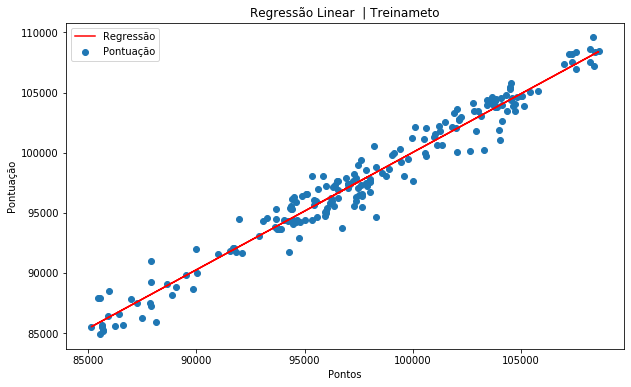

In [198]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train, y_train, label='Pontuação')
plt.plot(X_train, y_pred, color='r', label='Regressão')
plt.xlabel('Pontos')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

In [199]:
X_test = np.array(test["Fechamento anterior"]).reshape(-1, 1)
y_test = test['Fechamento']
y_pred = model.predict(X_test)

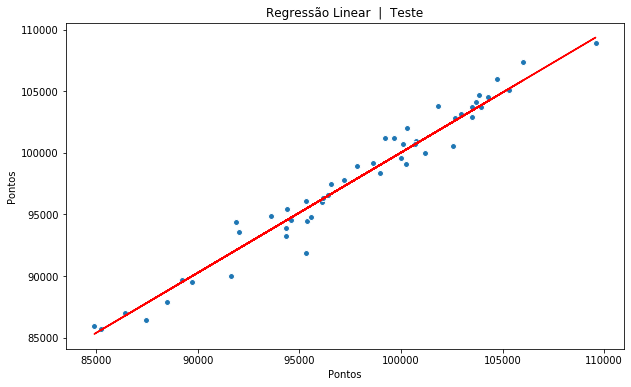

In [200]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  |  Teste')
plt.plot(X_test,y_pred , color='r', label='Regressão')
plt.scatter(X_test, y_test, edgecolor='w', label='Pontos')
plt.xlabel('Pontos')
plt.ylabel('Pontos')

plt.show()


In [201]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)


0.9646761940797429

# Análise de resíduos 

In [202]:
e=y_test-y_pred

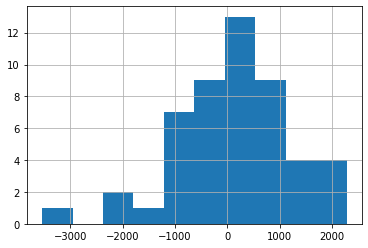

In [210]:
e.hist();

In [212]:
from scipy.stats import norm

mu, std = norm.fit(e)
        
x = np.linspace(min(e), max(e), 100)
p = norm.pdf(x, mu, std)



In [205]:
ibovespa['Predição'] = model.predict(np.array(ibovespa["Fechamento"]).reshape(-1, 1))

In [207]:
ibovespa.head()

,Date,Fechamento anterior,Fechamento,Predição
0,2018-11-08,85620.0,85641.0,86008.212180
1,2018-11-09,85641.0,85525.0,85895.066500
2,2018-11-12,85525.0,84914.0,85299.100892
3,2018-11-13,84914.0,85973.0,86332.042919
4,2018-11-14,85973.0,88515.0,88811.493940
